# Adaption Evaluation
Comparision between: 
- MAML
- pretrained model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import vectorbt as vbt

sns.set()
import plotly.graph_objects as go
from copy import deepcopy
from stock_env.envs import *
from stock_env.common.common_utils import (
    open_config,
    create_performance,
    plot_trade_log_v2,
)
from stock_env.exp_manager import ExperimentManager
from stock_env.algos.maml import adapt, get_task_loss
from stock_env.algos.buffer import RolloutBuffer
from stock_env.algos.agent import MetaAgent
from stock_env.common.evaluation import evaluate_agent, play_an_episode


def plot_mean_reward(fig, df, fill_color, line_color, name):

    fig.add_trace(
        go.Scatter(
            x=df["n_adapt_steps"],
            y=df["mean-std"],
            mode="lines",
            fill=None,
            line=dict(width=0.5, color=fill_color),
            showlegend=False,
        )
    )

    fig.add_trace(
        go.Scatter(
            x=df["n_adapt_steps"],
            y=df["mean+std"],
            fill="tonexty",
            mode="lines",
            line=dict(width=0.5, color=fill_color),
            showlegend=False,
        )
    )

    fig.add_trace(
        go.Scatter(
            x=df["n_adapt_steps"],
            y=df["mean"],
            fill=None,
            line_color=line_color,
            name=name,
        )
    )

In [2]:
ARGS_PATH = "../configs/maml.yaml"
ENV_ID = "VNALL-v0"
METHODS_STATE_DICT = {
    "random": None,
    "maml": "../model/maml_sp500_20221222_115520.pth",
}
exp = ExperimentManager(
    args_path=ARGS_PATH, env_id=ENV_ID, methods_state_dict=METHODS_STATE_DICT
)

In [3]:
adaption_results = exp.mass_adaption_results(
    methods=["maml"],
    maybe_num_tasks=5,
    total_adapt_steps=4,
    n_eval_episodes=5,
)
adaption_results

2022-12-22 13:03:55,334 : INFO : Evaluating ticker C47 with method 'maml'...
2022-12-22 13:04:07,419 : INFO : Evaluating ticker DHC with method 'maml'...
2022-12-22 13:04:19,659 : INFO : Evaluating ticker ITC with method 'maml'...
2022-12-22 13:04:31,505 : INFO : Evaluating ticker DBC with method 'maml'...
2022-12-22 13:04:43,320 : INFO : Evaluating ticker DCL with method 'maml'...


,task,n_adapt_steps,model_type,mean,std,inner_loss
0,C47,0,maml,61.987549,94.304398,0.156858
1,C47,1,maml,55.139534,41.923618,-0.007166
2,C47,2,maml,15.425817,64.829346,0.001585
3,C47,3,maml,-16.139961,28.515631,-0.009217
4,C47,4,maml,-25.563850,23.709747,-0.007595
5,DHC,0,maml,52.237522,96.005676,0.013042
6,DHC,1,maml,20.302872,91.886581,0.013486
7,DHC,2,maml,48.633488,97.634422,0.007538
8,DHC,3,maml,-14.969468,45.414391,-0.007499
9,DHC,4,maml,-0.390380,12.795130,-0.007975


In [4]:
agg_stats = adaption_results.groupby("n_adapt_steps").agg({"mean": "mean"})
agg_stats.reset_index(inplace=True)

In [5]:
import plotly.express as px

fig = px.line(
    agg_stats,
    x="n_adapt_steps",
    y="mean",
    # color="task",
    # color_discrete_sequence=px.colors.qualitative.Antique,
)
fig.show()

In [6]:
TASKS = ["HAH", "HPG", "VND", "VNM"]

trading_performance, params = exp.mass_trading_performance(
    methods=["maml"],
    maybe_num_tasks=TASKS,
    total_adapt_steps=3,
)
trading_performance

2022-12-22 13:04:55,424 : INFO : Adapt #0: trading 'HAH' with method 'maml'...
2022-12-22 13:04:56,729 : INFO : Adapt #1: trading 'HAH' with method 'maml'...


Ticker: HAH, from date 2022-11-03 00:00:00 to date 2022-12-20 00:00:00
Ticker: HAH, from date 2020-11-03 00:00:00 to date 2021-11-03 00:00:00


2022-12-22 13:04:58,210 : INFO : Adapt #2: trading 'HAH' with method 'maml'...
2022-12-22 13:04:59,509 : INFO : Adapt #3: trading 'HAH' with method 'maml'...


Ticker: HAH, from date 2022-11-03 00:00:00 to date 2022-12-20 00:00:00
Ticker: HAH, from date 2019-11-05 00:00:00 to date 2020-11-03 00:00:00


2022-12-22 13:05:01,000 : INFO : Adapt #0: trading 'HPG' with method 'maml'...


Ticker: HPG, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


2022-12-22 13:05:02,466 : INFO : Adapt #1: trading 'HPG' with method 'maml'...


Ticker: HPG, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


2022-12-22 13:05:03,957 : INFO : Adapt #2: trading 'HPG' with method 'maml'...


Ticker: HPG, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


2022-12-22 13:05:05,408 : INFO : Adapt #3: trading 'HPG' with method 'maml'...


Ticker: HPG, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


2022-12-22 13:05:06,849 : INFO : Adapt #0: trading 'VND' with method 'maml'...


Ticker: VND, from date 2021-11-17 00:00:00 to date 2022-11-17 00:00:00


2022-12-22 13:05:08,336 : INFO : Adapt #1: trading 'VND' with method 'maml'...


Ticker: VND, from date 2021-11-17 00:00:00 to date 2022-11-17 00:00:00


2022-12-22 13:05:09,825 : INFO : Adapt #2: trading 'VND' with method 'maml'...


Ticker: VND, from date 2021-11-17 00:00:00 to date 2022-11-17 00:00:00


2022-12-22 13:05:11,386 : INFO : Adapt #3: trading 'VND' with method 'maml'...


Ticker: VND, from date 2021-11-17 00:00:00 to date 2022-11-17 00:00:00


2022-12-22 13:05:12,894 : INFO : Adapt #0: trading 'VNM' with method 'maml'...


Ticker: VNM, from date 2019-11-05 00:00:00 to date 2020-11-03 00:00:00


2022-12-22 13:05:14,410 : INFO : Adapt #1: trading 'VNM' with method 'maml'...


Ticker: VNM, from date 2019-11-05 00:00:00 to date 2020-11-03 00:00:00


2022-12-22 13:05:15,915 : INFO : Adapt #2: trading 'VNM' with method 'maml'...


Ticker: VNM, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


2022-12-22 13:05:17,367 : INFO : Adapt #3: trading 'VNM' with method 'maml'...


Ticker: VNM, from date 2021-11-03 00:00:00 to date 2022-11-03 00:00:00


maml
n_adapt_steps ticker metric                    
0             HAH    annual_return          0.0
                     cum_returns_final      0.0
                     sharpe_ratio           NaN
                     max_drawdown           0.0
                     annual_volatility      0.0
...                                         ...
3             VNM    cum_returns_final -0.02367
                     sharpe_ratio      -0.10793
                     max_drawdown      -0.15611
                     annual_volatility  0.13764
                     value_at_risk          NaN

[96 rows x 1 columns]

In [7]:
trading_performance.loc[
    (slice(0, 5), TASKS, ("sharpe_ratio", "max_drawdown")), :
].sort_index()

maml
n_adapt_steps ticker metric               
0             HAH    max_drawdown      0.0
                     sharpe_ratio      NaN
              HPG    max_drawdown      0.0
                     sharpe_ratio      NaN
              VND    max_drawdown -0.71957
                     sharpe_ratio -1.48937
              VNM    max_drawdown      0.0
                     sharpe_ratio      NaN
1             HAH    max_drawdown      0.0
                     sharpe_ratio      NaN
              HPG    max_drawdown -0.42766
                     sharpe_ratio  -2.5821
              VND    max_drawdown -0.71957
                     sharpe_ratio -1.48937
              VNM    max_drawdown -0.20093
                     sharpe_ratio  0.23228
2             HAH    max_drawdown      0.0
                     sharpe_ratio      NaN
              HPG    max_drawdown -0.42864
                     sharpe_ratio -2.58425
              VND    max_drawdown -0.71957
                     sharpe_ratio -1.48937
              VNM    max_drawdown -0.15611
                     sharpe_ratio -0.10793
3             HAH    max_drawdown      0.0
                     sharpe_ratio      NaN
              HPG    max_drawdown -0.42826
                     sharpe_ratio -2.58454
              VND    max_drawdown -0.32562
                     sharpe_ratio -1.63251
              VNM    max_drawdown -0.15611
                     sharpe_ratio -0.10793

# Evaluate task trading performance

Ticker: VNM, from date 2020-11-03 00:00:00 to date 2021-11-03 00:00:00

        Annual return     : -8.20%
        Cumulative return : -8.13%
        Sharpe ratio      : -0.64
        Maximum Drawdown  : -14.88%
        Annual Volatility :  12.31%
        Value-At-Risk     :  nan%
        


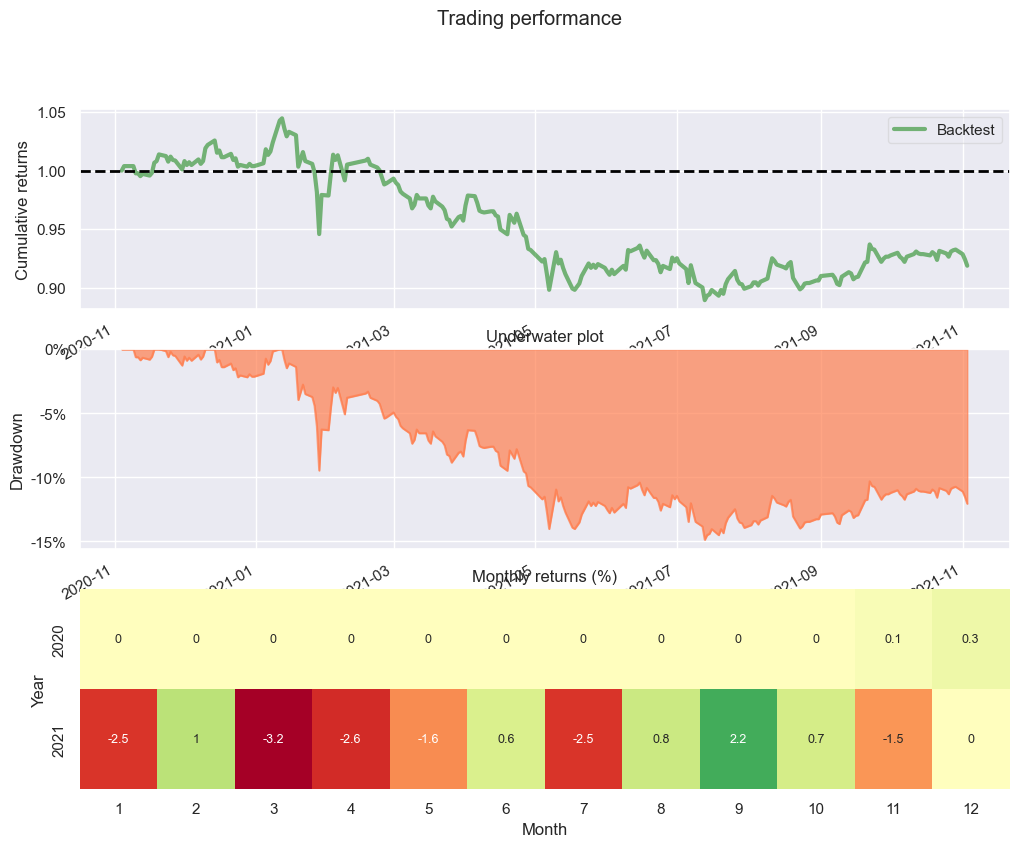

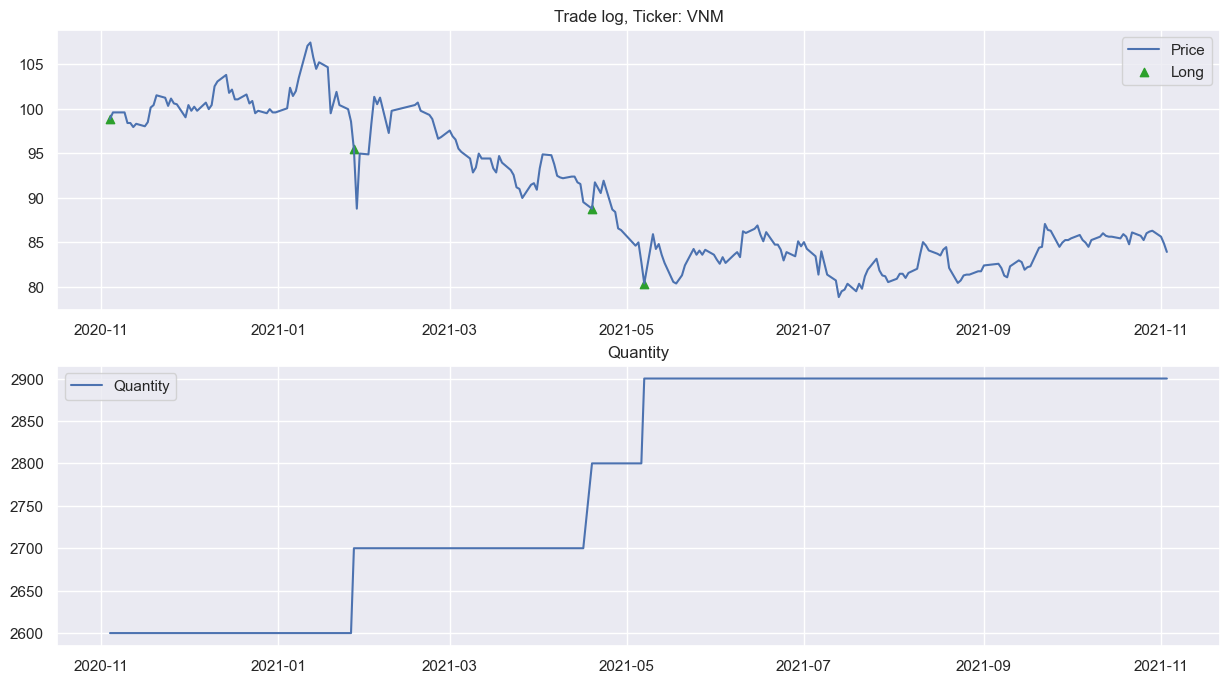

In [56]:
ENV_ID = "VNALL-v0"
TASK = "VNM"
ITH_ADAPT_STEP = 2

args = open_config("../configs/maml.yaml", env_id=ENV_ID)
envs = MetaVectorEnv([lambda: gym.make(ENV_ID) for _ in range(1)])
agent = MetaAgent(envs=envs, hiddens=args.hiddens)
agent.load_state_dict(params["maml"][TASK][ITH_ADAPT_STEP])

envs.train(False)
envs.reset_task(TASK)

info = play_an_episode(agent, envs)
df = info["final_info"][0]["final_history"]

returns = df.set_index("time")["portfolio_value"].pct_change()
perf = create_performance(returns, plot=True)

plot_trade_log_v2(df)

# portfolio value from hodling
df["pv_from_holding"] = vbt.Portfolio.from_holding(
    df.close, init_cash=envs.envs[0].init_cash
).value()
df = df.set_index("time")
ticker = df["ticker_x"].unique()[0]

fig = go.Figure()
fig.update_layout(width=800, height=500)
fig.update_layout(title=f"Buy-n-Hold Comparision, Ticker: {ticker}", title_x=0.5)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Portfolio Value (VND)")

df["portfolio_value"].vbt.plot_against(
    other=df["pv_from_holding"],
    other_trace_kwargs=dict(
        line=dict(width=2, color="dimgray"), mode="lines", name="Buy-n-Hold"
    ),
    trace_kwargs=dict(
        mode="lines+markers",
        line=dict(width=3, color="lightslategray"),
        name="MAML",
    ),
    pos_trace_kwargs=dict(fillcolor="palegreen"),
    neg_trace_kwargs=dict(fillcolor="salmon"),
    fig=fig,
)
fig.show()

In [53]:
# # preprocess for plotting
# df_result = pd.DataFrame(results)
# df_result["mean-std"] = df_result["mean"] - df_result["std"]
# df_result["mean+std"] = df_result["mean"] + df_result["std"]
# maml_df = df_result[df_result.model_type == "maml"]
# random_df = df_result[df_result.model_type == "random"]

# fig = go.Figure()
# # adjust size Figure
# fig.update_layout(width=500, height=500)
# fig.update_layout(
#     title="Mean Reward +/- Std vs Number of Adaptation Steps", title_x=0.5
# )
# fig.update_xaxes(
#     title_text="Number of Adaptation Steps", dtick=1, range=[0, TOTAL_ADAPT_STEPS - 1]
# )
# fig.update_yaxes(title_text="Mean Reward +/- Std", dtick=100)

# plot_mean_reward(fig, maml_df, fill_color="lightcoral", line_color="red", name="MAML")
# plot_mean_reward(
#     fig, random_df, fill_color="lightskyblue", line_color="blue", name="Random"
# )

# fig.show()